# Oblig 1 - Høst 2022

$\bold{a)}$ Antar vi har en kvadratisk leder som består av fire linjestykker, hver med lengde $2a$, og som har en total ladning $Q$:

<center><img src="skisseA.png"></center>



I origo så befinner vi oss midt inni lederen. Siden det elektriske feltet inni en leder er null, så må det elektriske feltet også være lik null i origo. Derimot er det elektriske feltet rett over og under origo lik $E_{over} = \dfrac{\sigma}{\epsilon_0}\hat{n}$ og $E_{under} = -\dfrac{\sigma}{\epsilon_0}\hat{n}$. Hvor $\hat{n} = \hat{z}$ er normalvektoren som peker opp fra flaten og $\sigma = Q/A$ er overflate-ladningstettheten med $A = 4a^2$. Hva kan vi si om potensialet? Jeg vet ikke. Kanskje at den vil øke lineært ettersom E-feltet er konstant.

$\bold{b)}$

(Rakk ikke å skrive inn)

$\bold{c)}$ Skriver et program som finner potensialet i yz-planet og visualiserer dette med det elektriske feltet.

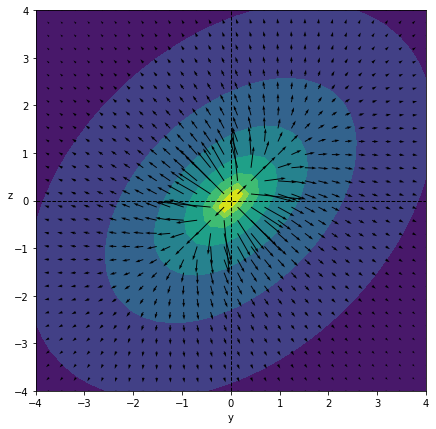

In [162]:
import numpy as np
import matplotlib.pyplot as plt
def epotlist(r,sigma,Rx,Ry):
    V=0
    for i in range(len(Rx.flat)):
        Ri = r - np.array(Rx.flat[i], Ry.flat[i])   # Vektoren fra punkt i kvadratladningen til ønsket punkt
        qi = sigma  # Ladningen er konstant for alle punkter
        Rinorm = np.linalg.norm(Ri) # Lengden på vektoren
        V = V + qi/Rinorm   # Superposisjonsprinsippet
    return V

a = 2           # Halv lengdestykke
Q = 1           # Total ladning
sigma = Q/(4*a) # Ladniningstetthet
Lx = 2*a        # Lengde langs x-aksen
Ly = 2*a        # Lengde langs y-aksen
N = 30          # Antall punkter
x = np.linspace(-Lx,Lx,N)   # Punkter langs x-aksen
y = np.linspace(-Ly,Ly,N)   # Punkter langs y-aksen
z = np.linspace(-Ly,Ly,N)   # Punkter langs z-aksen (kan være større enn Ly*Ly)
Rx,Ry = np.meshgrid(x, y)   # Posisjonen for hvert punkt i kvadratladningen
ry,rz = np.meshgrid(y, z)   # Posisjonen i yz-planet hvor vi vil finne potensialet
V = np.zeros((N,N),float)
for i in range(len(ry.flat)):
    r = np.array([ry.flat[i],rz.flat[i],0.0])
    V.flat[i] = epotlist(r,sigma,Rx,Ry)

plt.figure(figsize=(7, 7))
Ey, Ex = np.gradient(-V)
plt.contourf(ry,rz,V)
plt.quiver(ry, rz, Ex, Ey)
plt.xlabel("y")
plt.ylabel("z", rotation=0)
plt.axhline(0, linewidth=1, color='k', linestyle="--")
plt.axvline(0, linewidth=1, color='k', linestyle="--")
plt.show()

$\bold{d)}$ Plotter det analytiske uttrykket $V(z)$ i samme plot for å se om de passer.

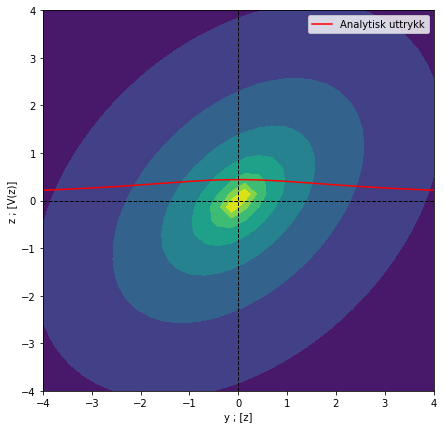

In [163]:
def V_a(z):
    return Q/a * np.arcsinh(a/np.sqrt(a**2 + z**2))

plt.figure(figsize=(7, 7))
plt.plot(z, V_a(z), "red", label="Analytisk uttrykk")
plt.contourf(ry,rz,V)
plt.xlabel("y ; [z]")
plt.ylabel("z ; [V(z)]")
plt.axhline(0, linewidth=1, color='k', linestyle="--")
plt.axvline(0, linewidth=1, color='k', linestyle="--")
plt.legend()
plt.show()

(I plottet gjelder aksene y og z for kontur-plottet, og deretter gjelder aksene z og V(z) for det analytiske uttrykket. Dette skal gå ettersom vi har satt y og z til å være like.)

Vi ser at det analytiske uttrykket følger det numeriske plottet. Potensialet er på sitt høyeste for begge løsningene ved $z = 0$ og blir mindre og mindre ettersom z øker. Vi ser fra det analytiske uttrykket at dette skyldes faktoren $(a/\sqrt({a^2 + z^2}))$; når $z \rightarrow 0$ blir denne faktoren større og større, som medfører at $\text{arcsinh}(k) = \ln(k + \sqrt(k^2 + 1))$ også blir større og større.

$\bold{e)}$ Bidraget fra $+Q$ til potensial forskjellen er:

$$
\begin{split}
\Delta V_{+Q} &= V(0) - V(2a) \\[10px]
&= \dfrac{Q}{4\pi \epsilon_0 a}\text{arcsinh}(\dfrac{a}{\sqrt{a^2}}) - \dfrac{Q}{4\pi \epsilon_0 a}\text{arcsinh}(\dfrac{a}{\sqrt{a^2 + 4a^2}}) \\[10px]
&= \dfrac{Q}{4\pi \epsilon_0 a} (\text{arcsinh}(1) - \text{arcsinh}(1/\sqrt{5})) \\[10px]
&\approx \dfrac{Q}{4\pi \epsilon_0 a} (0.88 - 0.43) \\[10px]
&= 0.45 \dfrac{Q}{4\pi \epsilon_0 a} \\
\end{split}
$$

Bidraget fra $-Q$ vil være det samme som dette, så den totale potensialforskjellen er: 

$$
\begin{split}
\Delta V &= \Delta V_{+Q} + \Delta V_{-Q} \\[10px]
&= 0.45 \dfrac{Q}{4\pi \epsilon_0 a} + 0.45 \dfrac{Q}{4\pi \epsilon_0 a} \\[10px]
&= 2 \cdot 0.45 \dfrac{Q}{4\pi \epsilon_0 a} \\[10px]
&= 0.45 \dfrac{Q}{2\pi \epsilon_0 a} \\[10px]
&= 0.225 \dfrac{Q}{\pi \epsilon_0 a} \\
\end{split}
$$

Kapasitansen til dette tilnærmede systemet blir da:

$$
\begin{split}
C = \dfrac{Q}{V} 
= \dfrac{Q}{0.225 \dfrac{Q}{\pi \epsilon_0 a}} 
= \dfrac{\pi \epsilon_0 a}{0.225}\\
\end{split}
$$

Siden vi satt $a=2$ og $\dfrac{1}{4\pi \epsilon_0}=1 \Rightarrow \pi \epsilon_0 = 1/4$ gir dette oss den tilnærmede kapasitansen $C = 2.22$.

$\bold{f)}$ Finner potensialet i punktet $(0, a, 2a)$ som skyldes $+Q$ kvadratet. Altså: 

<center><img src="skisseC.png"></center>

In [164]:
r = np.array([0, a, 2*a])
V = epotlist(r, sigma, Rx, Ry)
print(V)
print(2*V)

24.478563992316364
48.95712798463273


Det var veldig høye verdier. Dette må skyldes av at koden ovenfor er feil på en eller annen måte. Prøver å gjøre om koden fra $\bold{c)}$ om til 3D for å se om vi får noe mer rimelig: (Prøvde å gjøre dette på starten, men fant ikke ut hvordan man skulle plotte yz-planet)

In [165]:
# Potensialet til en dipol i xy-planet
import numpy as np
import matplotlib.pyplot as plt
def epotlist(r,sigma,Rx,Ry,Rz):
    V=0
    for i in range(len(Rx[0].flat)):
        Ri = r - np.array([Rx[0].flat[i], Ry[0].flat[i], Rz[0].flat[i]])   # Vektoren fra punkt i kvadratladningen til ønsket punkt
        qi = sigma  # Ladningen er konstant for alle punkter
        Rinorm = np.linalg.norm(Ri) # Lengden på vektoren
        V = V + qi/Rinorm   # Superposisjonsprinsippet
    return V
a = 2           # Halv lengdestykke
Q = 1           # Total ladning
sigma = Q/(4*a) # Ladniningstetthet
Lx = 2*a        # Lengde langs x-aksen
Ly = 2*a        # Lengde langs y-aksen
N = 5           # Antall punkter
x = np.linspace(-Lx,Lx,N)   # Punkter langs x-aksen
y = np.linspace(-Ly,Ly,N)   # Punkter langs y-aksen
z = np.linspace(-Ly,Ly,N)   # Punkter langs z-aksen (kan være større enn Ly*Ly)
Rx,Ry,Rz = np.meshgrid(x, y, np.zeros(N))  # Posisjonen for hvert punkt i kvadratladningen
rx,ry,rz = np.meshgrid(np.zeros(N), y, z)  # Posisjonen i yz-planet hvor vi vil finne potensialet
V = np.zeros((N,N,N),float)
for i in range(len(ry.flat)):
    r = np.array([rx.flat[i],ry.flat[i],rz.flat[i]])
    V.flat[i] = epotlist(r,sigma,Rx,Ry,Rz)

d:\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Dette gir oss potensialforskjellen:

In [166]:
r = np.array([0, a, 2*a])
V = epotlist(r, sigma, Rx, Ry, Rz)
print(V)
print(2*V)

0.4052949475031655
0.810589895006331


Kapasitansen til systemet vi får numerisk er altså $C = Q / V = 1 / 0.81 = 1.23$, mens den analytiske tilnærmingen ga oss $C = 2.22$. Den analytsike tilnærmingen gir med andre ord høyere kapasitans enn den numeriske tilnærmingen.

$\bold{g)}$ Plotter potensialet som skyldes $+Q$ kvadratet langs linjen ved y = a for $-Q$ kvadratet. Atlså: 

<center><img src="skisseB.png"></center>

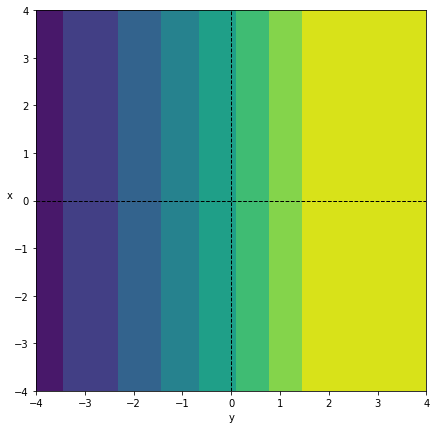

In [167]:
def epotlist(r,sigma,Rx,Ry):
    V=0
    for i in range(len(Rx.flat)):
        Ri = r - np.array(Rx.flat[i], Ry.flat[i])   # Vektoren fra punkt i kvadratladningen til ønsket punkt
        qi = sigma  # Ladningen er konstant for alle punkter
        Rinorm = np.linalg.norm(Ri) # Lengden på vektoren
        V = V + qi/Rinorm   # Superposisjonsprinsippet
    return V

Rx,Ry = np.meshgrid(x, y)  # Posisjonen for hvert punkt i kvadratladningen
rx,ry = np.meshgrid(x, y)
V = np.zeros((N,N),float)
for i in range(len(ry.flat)):
    r = np.array([rx.flat[i], a, 2*a])  # Går over alle x-verdiene
    V.flat[i] = epotlist(r,sigma,Rx,Ry)

plt.figure(figsize=(7, 7))
plt.contourf(rx,ry,V)
plt.xlabel("y")
plt.ylabel("x", rotation=0)
plt.axhline(0, linewidth=1, color='k', linestyle="--")
plt.axvline(0, linewidth=1, color='k', linestyle="--")
plt.show()

Her ser det ut som potensialet har sin største verdi utenfor linjen $y = a$, altså utenfor $-Q$ kvadratet. Er ikke sikker på om dette skyldes feil i kodingen eller om det er riktig. Hvis det er riktig, så vil jeg tro dette har noe med at ladningen til en leder befinner seg på utkanten av lederen. Hvilke konsekvenser dette har for kapasitansen er jeg usikker på.